In [14]:
! pip install seaborn --upgrade

  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.10.0
    Uninstalling seaborn-0.10.0:
      Successfully uninstalled seaborn-0.10.0


You should consider upgrading via the 'c:\users\wrope\anaconda3\python.exe -m pip install --upgrade pip' command.


In [15]:
import pandas as pd
import sqlite3
import os
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import numpy as np

# Preparación de los datos simulados para analisis

#### Función para leer datos

In [2]:
def conexion_bd(sql=None, database = None,update=True):
    
    sqlite3.register_adapter(np.int64, lambda val: int(val))
    sqlite3.register_adapter(np.int32, lambda val: int(val))

    con = sqlite3.connect(os.getcwd() + os.sep + database)
    
    try:
        if update == True:
            cur = con.cursor()
            cur.execute(sql)
            con.commit()
            df=None
        else:
            df= pd.read_sql_query(sql, con=con)
    except:
        print(sql)
        df=None
    con.close()
    
    return df

#### Exploración de datos

In [3]:
df1 = conexion_bd(sql='select*from parametros', database = 'result_op.db',update=False) 
df2 = conexion_bd(sql='select*from parametros', database = 'result_op__.db',update=False)
df = pd.concat([df1,df2]).drop_duplicates().reset_index(drop=True)

In [4]:
df3 = conexion_bd(sql="""select id_simulacion, energia_PV, energia_Dg, 
                        energia_carga_bateria, energia_descarga_bateria, 
                        energia_ENS, "SOC(t)_bateria",load, p_bat_pv, p_bat_dg 
                        from resultados""",
                  database='result_op.db',
                  update=False)
df4 = conexion_bd(sql="""select id_simulacion, energia_PV, energia_Dg, 
                        energia_carga_bateria, energia_descarga_bateria, 
                        energia_ENS, "SOC(t)_bateria", load, p_bat_pv, 
                        p_bat_dg from resultados""",
                  database='result_op__.db',
                  update=False)
df0 = pd.concat([df3, df4]).reset_index(drop=True)

In [5]:
df0 = df0.groupby('id_simulacion').sum().reset_index()

In [6]:
df_analisis = df.merge(df0, left_on='id_simulacion', right_on='id_simulacion')

In [29]:
df.count()

id_simulacion          156
n_pv                   156
n_dg                   156
p_dg                   156
min_dg                 156
efi_dg                 156
lpsp                   156
p_bat                  156
cond_init_bat          156
val_aux_bateria        156
DOD                    156
n_bat                  156
self_dis_coef          156
max_ciclos_descarga    156
efficiency_inversor    156
efficiency_charging    156
C_rate                 156
cost_pv                156
cost_dg                156
cost_bat               156
cost_pens              156
optimizacion           156
lpsp_result            156
ens_result             156
ciclos_bat_result      156
vida_proyecto          125
ir                     125
crf                    125
cpv_ins                125
cbat_ins               125
cdg_ins                125
capital_cpv            125
capital_cbat           125
capital_cdg            125
kbat                   125
kdg                    125
ybat                   125
y

In [42]:
df_analisis['energy_dg'] = df_analisis['p_bat_dg'] +df_analisis['energia_Dg'] 

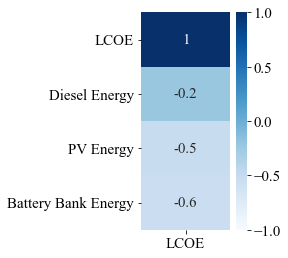

In [84]:
data_cor = df_analisis.query('optimizacion=="optimal" ')[[
    'energia_PV', 'energia_descarga_bateria', 'energy_dg', 'asc','lcoe'
    ]]

data_cor.columns = ['PV Energy', 'Battery Bank Energy', 'Diesel Energy', 'ASC', 'LCOE']

plt.figure(figsize=(2, 4))
heatmap = sns.heatmap(data_cor[['PV Energy', 'Battery Bank Energy', 'Diesel Energy', 'LCOE']].corr()[[
    'LCOE',
]].sort_values(by='LCOE', ascending=False),
    vmin=-1,
    vmax=1,
    annot=True,cmap='Blues', fmt='0.1g')
plt.savefig('lcoe_correlation.eps',bbox_inches='tight')

AttributeError: 'Text' object has no property 'cmap'

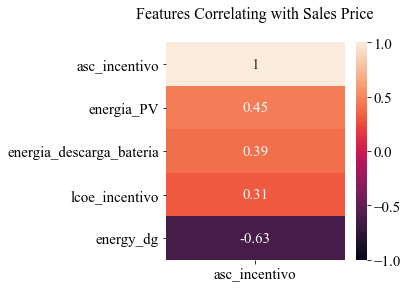

In [85]:
['PV Energy', 'Battery Bank Energy', 'Diesel Energy', 'ASC', 'LCOE']

plt.figure(figsize=(4, 4))
heatmap = sns.heatmap(df_analisis.query('optimizacion=="optimal" ')[[
    'energia_PV', 'energia_descarga_bateria', 'energy_dg', 'asc_incentivo',
    'lcoe_incentivo'
]].corr()[[
    'asc_incentivo',
]].sort_values(by='asc_incentivo', ascending=False),
    vmin=-1,
    vmax=1,
    annot=True)
heatmap.set_title('Features Correlating with Sales Price',
                  fontdict={
                      'fontsize': 16,
                      'fontfamily': 'Times New Roman'
                  },
                  pad=24)

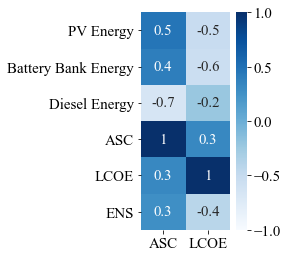

In [90]:
data_cor = df_analisis.query('optimizacion=="optimal" ')[[
    'energia_PV', 'energia_descarga_bateria', 'energy_dg', 'asc','lcoe','energia_ENS'
    ]]

data_cor.columns = ['PV Energy', 'Battery Bank Energy', 'Diesel Energy', 'ASC', 'LCOE','ENS']

plt.figure(figsize=(2, 4))
heatmap = sns.heatmap(data_cor[['PV Energy', 'Battery Bank Energy', 'Diesel Energy', 'ASC','LCOE','ENS']].corr()[[
    'ASC','LCOE'
]],
    vmin=-1,
    vmax=1,
    annot=True,cmap='Blues', fmt='0.1g')

plt.savefig('asc_lcoe_correlation.eps',bbox_inches='tight')

In [66]:
import os
os.getcwd()

'C:\\Users\\wrope\\Documents\\01. UdeA\\00. Tesis\\09. Implementacion\\dimensionamiento_microrred'

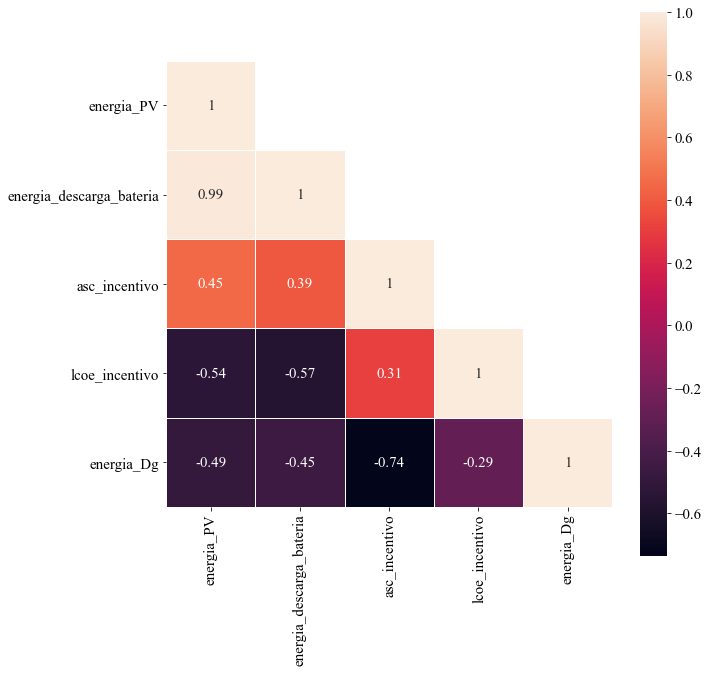

In [10]:
corrMatrix = df_analisis.query('optimizacion=="optimal" ')[[
    'energia_PV', 'energia_descarga_bateria',
    'asc_incentivo', 'lcoe_incentivo', 'energia_Dg']].corr()

lower_triang_df = corrMatrix.where(np.tril(np.ones(corrMatrix.shape)).astype(np.bool))

plt.figure(figsize=(10, 10))
plt.rcParams.update({'font.size': 15,'font.family':'Times New Roman'})




sns.heatmap(lower_triang_df,
            annot=True,
            annot_kws={"size": 15},
            square=True,
            linewidths=.5)
plt.show()

<AxesSubplot:xlabel='energia_PV'>

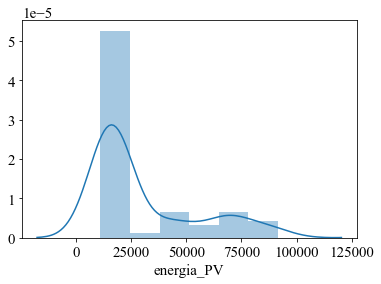

In [25]:
sns.distplot( df_analisis.query('optimizacion=="optimal" and p_dg !=0 ')["energia_PV"])

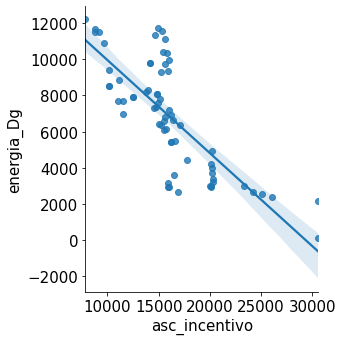

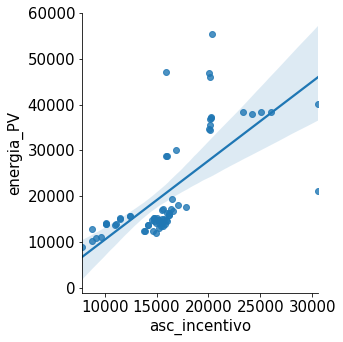

In [63]:
sns.lmplot(x="asc_incentivo", y="energia_Dg", data=df_analisis.query('optimizacion=="optimal" and p_dg !=0 '));
sns.lmplot(x="asc_incentivo", y="energia_PV", data=df_analisis.query('optimizacion=="optimal" and p_dg !=0 '));

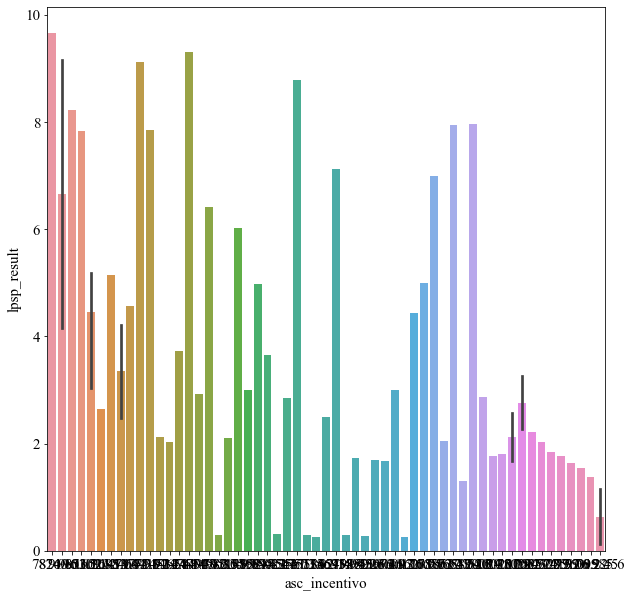

In [26]:
plt.figure(figsize=(10, 10))
sns.barplot(data=df_analisis.query('optimizacion=="optimal" and p_dg !=0 '), x="asc_incentivo", y="lpsp_result")
plt.show()

# Preguntas de investigación

### ¿El costo baja o sube cuando aumenta el uso de la generación diésel?

### ¿Cómo se comporta el modelo al variar el LPSP?

### ¿ El modelo mejora la prestación del servicio comparado con lo que esta actual?

### ¿Cómo se comporta el tiempo de convergencia del modelo al variar los parametros?

### ¿Qué tipo de problema de opt es y cómo se comporta en solvers de tipo libre (COIN)?